# Introduction to Inferential Statistics

1. Inferential Statistics 
2. Sampling Techniques  
    a. Convenience Sampling  
    b. Systematic Sampling  
    c. Simple Random Sampling  
    d. Stratified Sampling  
    e. Cluster Sampling  
4. Population Parameter vs Sample Statistic
5. Estimation
    - Sampling in Pandas DataFrame
    - Point Estimate
    - How large a sample should be?
    - Central Limit Theorem
    - Confidance Interval Estimates (Central Limit Theorem)

## Inferential Statistics

<img style="float: right;" width="600" height="400" src="images/01_inferential_stats.PNG">
Idea is to estimate the Population's PARAMETERS using Sample's Statistics.

Inferential statistics involves making inferences or predictions about a population based on a sample of data. It's used when it's not feasible or practical to study an entire population, so we use sample data to draw conclusions about the larger population.

Key concepts in inferential statistics include confidence intervals, hypothesis testing, and regression analysis. It helps us make educated guesses or predictions about a population parameter based on sample data.

The goal is to leverage data in real time to make informed decisions, optimize processes, and enhance overall business performance.

## Sampling Techniques  
Sampling techniques are methods used to select a subset of individuals or items from a larger population for the purpose of making inferences about the entire population. The choice of sampling technique depends on the research objectives, resources available, and the characteristics of the population being studied. Each technique has its own strengths and limitations in terms of representativeness, precision, and practicality. Here are various sampling techniques:

1. **Convenience Sampling:**
   - Individuals are selected based on their availability and accessibility. This method is convenient but may not be representative of the population. Example: Conduct interviews with people in a shopping mall to gather opinions on a new product.

2. **Systematic Sampling:**
   - Individuals or items are selected at regular intervals from an ordered list. For example, every 5th item is selected.

3. **Simple Random Sampling (SRS):**
   - In SRS, every individual or item in the population has an equal chance of being selected. This is done **without replacement**. Example: Assign a unique number to each student in a school, and then use a random number generator to select 50 students from the list.

4. **Stratified Sampling:**
   - The population is divided into distinct strata (subgroups) based on certain characteristics. Then, random samples are drawn from each stratum proportionally. Divide a city's population into age groups (e.g., 0-18, 19-35, 36-60, 60+), and then randomly select a proportional number of individuals from each group.

5. **Cluster Sampling:**
   - The population is divided into clusters, and a random sample of clusters is selected. Then, all individuals within the selected clusters are included in the sample. Example: Divide a country into regions, randomly select a few regions, and then survey all households within those chosen regions.

## Population Parameter and Sample Statistics

**Population Parameter:**  
A population parameter is a numerical characteristic of an entire population. It describes some aspect of the population's distribution or behavior. Examples of population parameters include the population mean, population standard deviation, population proportion, etc.
For example, if you're interested in the average height of all adult males in a country, the actual average height of the entire population is the population parameter.

**Sample Statistics:**  
Sample statistics are numerical measures calculated from a sample (subset) of the population. They are used to estimate or infer information about the corresponding population parameter. Common sample statistics include the sample mean, sample standard deviation, sample proportion, etc.
Using the previous example, if you select a group of 100 adult males from that country and calculate their average height, that calculated value is a sample statistic. This sample statistic is an estimate of the population parameter (average height of all adult males).

1. **Population Mean (μ) and Sample Mean (x̄):**
   - Population Mean (μ): $ \mu = \frac{\sum x}{N} $
   - Sample Mean (x̄): $ x̄ = \frac{\sum x}{n} $

2. **Population Variance (σ²) and Sample Variance (s²):**
   - Population Variance (σ²): $ \sigma² = \frac{\sum (x - \mu)²}{N} $
   - Sample Variance (s²): $ s² = \frac{\sum (x - x̄)²}{n-1} $ (Note: Bessel's correction is applied for sample variance)

3. **Population Standard Deviation (σ) and Sample Standard Deviation (s):**
   - Population Standard Deviation (σ): $ \sigma = \sqrt{\sigma²} $
   - Sample Standard Deviation (s): $ s = \sqrt{s²} $

**Bessel's Correction**  
Bessel's correction is a mathematical adjustment made to sample statistics to provide unbiased estimates of population parameters. It's particularly important when calculating the sample variance and sample standard deviation.

The main utility of Bessel's correction lies in correcting the bias that can occur when estimating population parameters from a sample. Without this correction, sample statistics can tend to underestimate the true population parameters.

In summary, Bessel's correction is a fundamental adjustment in statistics that helps to provide more accurate estimates of population parameters based on sample data. It ensures that sample statistics, particularly the sample variance, are unbiased estimators of their corresponding population parameters.

## How to perform Estimations/Approximations/Inference?

**Step 1 -** Take a Sample. Uniformly at random try to take a large enough sample from population such that the sample is a correct representation of the entire population.  
**Step 2 -** Calculate the Sample Statistics  
**Step 3 -** Estimate the Population Parameter using the Sample Statistics. There are various estimation techniques like Point Estimate, Confidence Interval Estimate, Maximum Likelyhood Estimation, GMM's, etc...

**Note that:**
1. Sample should be sufficiently large.
    - **Why?** So that it start representing the population  
2. Sample should be a correct representaion of the population.
    - **Why?** So that you can make unbiased estimates 
3. Sample should be unbiased (choose better sampling technique)

**Bias (i.e. Error)**
1. Sampling Bias - Can be resolved by choosing a better sampling process
2. Outlier Bias - Can be resolved by taking a sufficiently large enough sample or using confidence interval estimate

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
population_df = pd.read_csv('data/adult.csv')

population_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
population_df.shape

(48842, 15)

In [4]:
population_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<Axes: xlabel='age', ylabel='Count'>

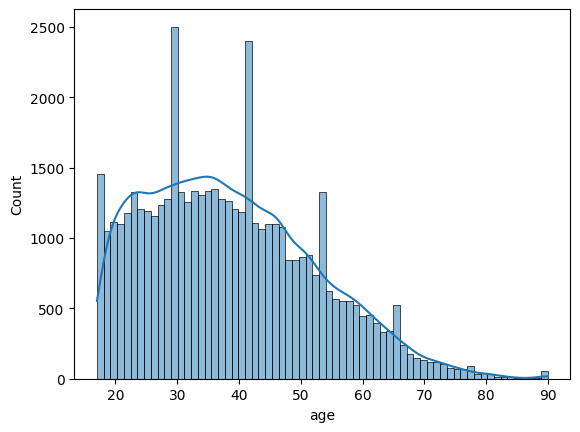

In [6]:
sns.histplot(population_df['age'], kde=True)

In [7]:
print('Number of rows: ', population_df.shape[0])
print('Population Mean: ', population_df['age'].mean())

Number of rows:  48842
Population Mean:  38.64358543876172


## Calculating the Average Age using Inferential Statistics

### Sampling in Pandas DataFrame

In [8]:
# Way 1 - Use frac to mention the fraction of data that you want to randomly sample

population_df.sample(frac=0.1, random_state=42)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43114,62,Local-gov,208266,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
5042,45,Private,256866,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
7027,25,Local-gov,170070,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
36588,47,Self-emp-not-inc,26145,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K


In [9]:
# Way 2 - Use n to mention the number of datapoints that you want to randomly sample

population_df.sample(n=100, random_state=42)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,30,Private,267281,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
32845,30,Private,272669,Some-college,10,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
36853,35,Private,202027,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,7298,0,35,United-States,>50K
28697,57,Private,279636,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,>50K


### Point Estimate
Point estimation involves using a single value (a point) from the sample data to estimate the population parameter. For example, using the sample mean to estimate the population mean.

In [10]:
# Step 1 - Uniformly at random take a large enough sample from population

sample_df = population_df.sample(frac=0.2, random_state=42)

sample_df.shape

(9768, 15)

In [11]:
# Step 2 - Calculate the Sample Statistics

sample_df['age'].mean()

38.7273751023751

In [12]:
# # Step 3 - Estimate the Population Parameter using the Sample Statistics

# # As we have a complete population data - 
# # Let's check what is the actual population parameter.

print("Population Mean (i.e. Parameter):", population_df['age'].mean())
print("Sample Mean (i.e. Statistics):", sample_df['age'].mean())

Population Mean (i.e. Parameter): 38.64358543876172
Sample Mean (i.e. Statistics): 38.7273751023751


### How large a sample should be?

In [13]:
sample_means = []

for sample_size in np.arange(1, 1000):
    sample_df = population_df.sample(n=sample_size)
    sample_means.append((sample_size, sample_df['age'].mean()))

sample_means_df = pd.DataFrame(sample_means, columns=['n', 'mean'])

sample_means_df.head()

,n,mean
0,1,47.00
1,2,25.00
2,3,34.00
3,4,45.75
4,5,33.80


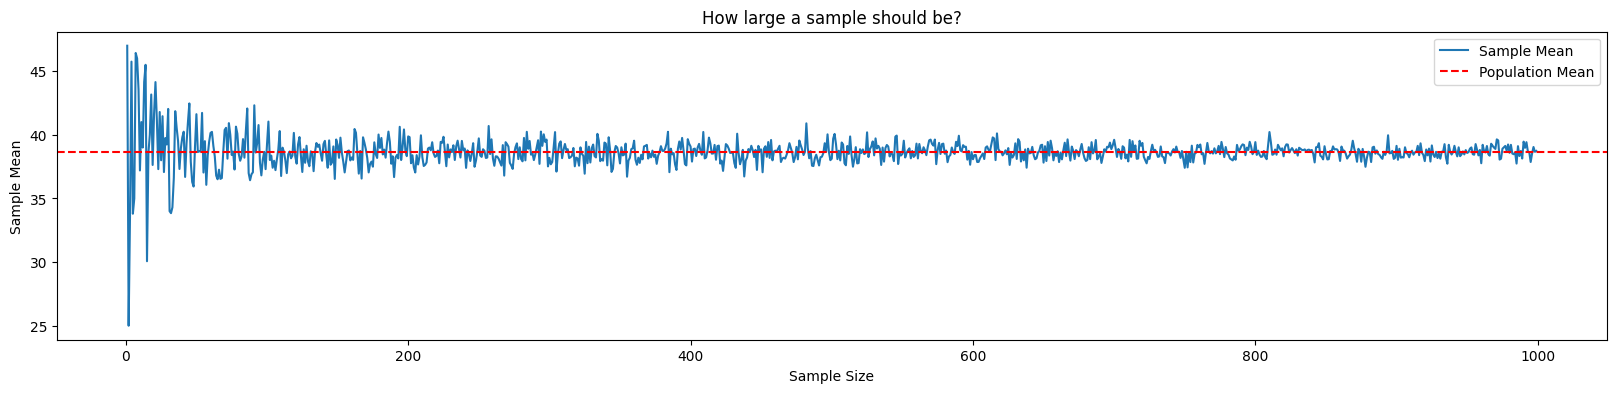

In [14]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.set_title("How large a sample should be?")  # Add a title to the axes
ax.set_xlabel('Sample Size')  # Add an x-label to the axes
ax.set_ylabel('Sample Mean')  # Add a y-label to the axes

sns.lineplot(data=sample_means_df, x="n", y="mean", ax=ax, label="Sample Mean")
ax.axhline(population_df['age'].mean(), ls='--', color='red', label="Population Mean")

ax.legend()

plt.show()

In [24]:
# Step 1: Take a sample (Large enough)
sample_df = population_df.sample(n=200, random_state=0)

In [25]:
# Step 2: Calculate sample statistic
sample_df['age'].mean()

38.94

In [ ]:
# Step 3: Pop Mean approx equal to Sample statistic

### Central Limit Theorem

The Central Limit Theorem (CLT) is a fundamental concept in statistics that describes the behavior of the sampling distribution of the sample mean as the sample size gets larger, **regardless of the shape of the population distribution**.

The Central Limit Theorem allows us to make reliable inferences about a population based on sample data, assuming that Sample size is sufficiently large (typically around 30 or more). It doesn't necessarily apply to other sample statistics like medians or variances. 

The CLT is widely used in various fields, such as quality control in manufacturing, finance, hypothesis testing, and in the interpretation of experimental results.

According to Central Limit Theorem, the sampling distribution of the sample mean $\bar{X}$:
1. Will be approximately normally distributed, regardless of the shape of the original population distribution.
\begin{equation}
\ \bar{X} \sim N(\mu_\bar{X}, \sigma_\bar{X})
\end{equation}
2. Will have a mean that is equal to the population mean (i.e. Population Parameter).
\begin{equation}
\ \mu_\bar{X} \approx \mu_{pop}
\end{equation}
3. Will have a standard deviation that is equal to the population standard deviation divided by the square root of the sample size
\begin{equation}
\ \sigma_\bar{X} \approx \sigma_{pop}
\end{equation}

In [13]:
def sampling_distribution(data, sample_size, number_of_sample):
    sample_means = []
    for m in range(number_of_sample):
        sample = data.sample(n=sample_size)
        sample_means.append((sample_size, sample.mean()))
    sampling_distribution_df = pd.DataFrame(sample_means, columns=['n', 'mean'])

    print("*"*20, " R E P O R T ", "*"*20)
    print("Mean Check")
    print("Sampling Distribution Mean:", sampling_distribution_df["mean"].mean())
    print("Population Mean: ", data.mean())

    print()
    print("Standard Deviation Check")
    print("Sampling Distribution Std:", sampling_distribution_df["mean"].std())
    print("Population Std / (sample_size)**0.5:", data.std()/np.sqrt(sample_size))

    print("*"*55)
    
    return sampling_distribution_df

In [14]:
def sampling_distribution_plot(data):
    fig, axes = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
    
    axes[0].set_title("Sampling Distribution")  # Add a title to the axes
    axes[0].set_xlabel('Mean')  # Add an x-label to the axes
    axes[0].set_ylabel('Density')  # Add a y-label to the axes

    sns.histplot(data, kde=True, ax=axes[0])
    
    stats.probplot(data, dist=stats.norm, plot=axes[1])
    axes[1].grid()
    
    plt.show()

********************  R E P O R T  ********************
Mean Check
Sampling Distribution Mean: 38.7834
Population Mean:  38.64358543876172

Standard Deviation Check
Sampling Distribution Std: 1.907679440704032
Population Std / (sample_size)**0.5: 1.9389589096341133
*******************************************************


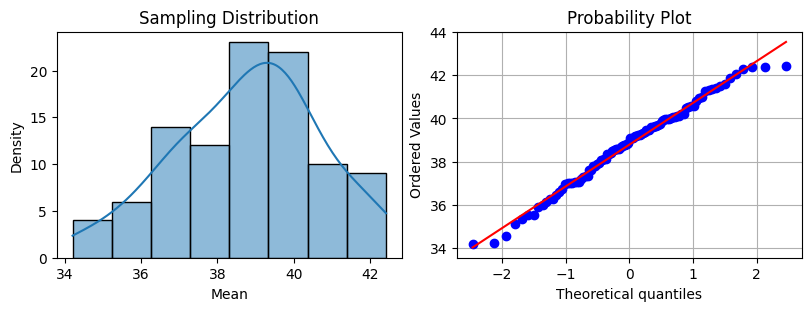

In [15]:
n=50
m=100

sampling_distribution_df = sampling_distribution(data=population_df['age'], sample_size=n, number_of_sample=m)

sampling_distribution_plot(data=sampling_distribution_df["mean"])

### Point Estimate using CLT

According to Central Limit Theorem, the sampling distribution of the sample mean will have a mean that is equal to the population mean.

**But, is it really a good idea to collect these many samples?**  

********************  R E P O R T  ********************
Mean Check
Sampling Distribution Mean: 38.622440000000005
Population Mean:  38.64358543876172

Standard Deviation Check
Sampling Distribution Std: 1.9226371941113019
Population Std / (sample_size)**0.5: 1.9389589096341133
*******************************************************


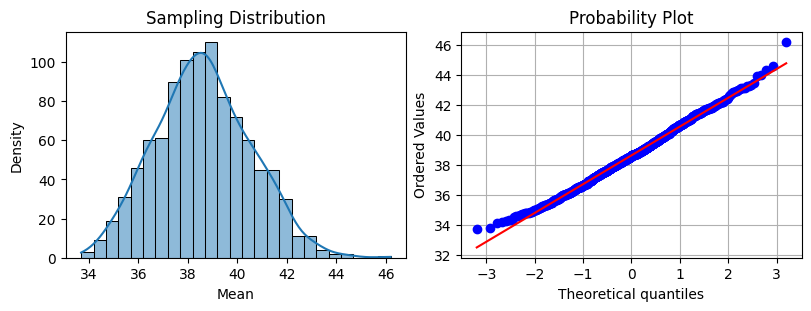

In [16]:
n=50
m=1000

sampling_distribution_df = sampling_distribution(data=population_df['age'], sample_size=n, number_of_sample=m)

sampling_distribution_plot(data=sampling_distribution_df["mean"])

### Confidence Interval Estimate

Confidence interval estimation provides a range (interval) of values within which the true population parameter is likely to fall. **It involves calculating a confidence interval around the point estimate.** For example, a 95% confidence interval might be [160 cm, 170 cm], indicating that we are 95% confident that the true population mean height falls within this range.

